In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_som.som import SOM
import salishsea_tools.viz_tools as sa_vi
from sklearn import preprocessing

ds = xr.open_dataset ('/results2/SalishSea/nowcast-green.202111/20mar22/SalishSea_1d_20220320_20220320_grid_T.nc')
ds_bio = xr. open_dataset ('/results2/SalishSea/nowcast-green.202111/20mar22/SalishSea_1d_20220320_20220320_biol_T.nc')

    # Variable selection
temp = ds.votemper
saline = ds.vosaline
date = pd.DatetimeIndex(ds['time_counter'].values)

    # Biological variables
sil = ds_bio.silicon
nitr = ds_bio.nitrate
ammo = ds_bio.ammonium

    # Open the mesh mask
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
mask = mesh.tmask.to_numpy()

depth = 0
temp = temp.where(mask[0,depth]==1)
saline = saline.where(mask[0,depth]==1)

sil = sil.where(mask[0,depth]==1)
nitr= nitr.where(mask[0,depth]==1)
ammo = ammo.where(mask[0,depth]==1)

# Post processing 
inputs = np.stack((temp[0,depth].values.flatten(), saline[0,depth].values.flatten()))
indx = np.argwhere(~np.isnan(inputs[0]) & ~np.isnan(inputs[1])) 
inputs2 = inputs[:,indx[:,0]]
inputs3 = preprocessing.normalize(inputs2, norm= 'max')
inputs3 = inputs3.transpose()

# SOM
temp_som = SOM(m=4, n=4, dim= inputs3[0,:].size, lr = 0.1)
temp_som.fit(inputs3, epochs = 5)
predictions = temp_som.predict(inputs3)

# Post processing
unique, counts = np.unique(predictions, return_counts=True)
indx2 = np.full(inputs[0,:].size,np.nan)
indx2[indx[:,0]] = predictions
clusters = np.reshape(indx2,(898,398)) 

Text(0.5, 1.0, 'SOM Clustering (2022/03/20)')

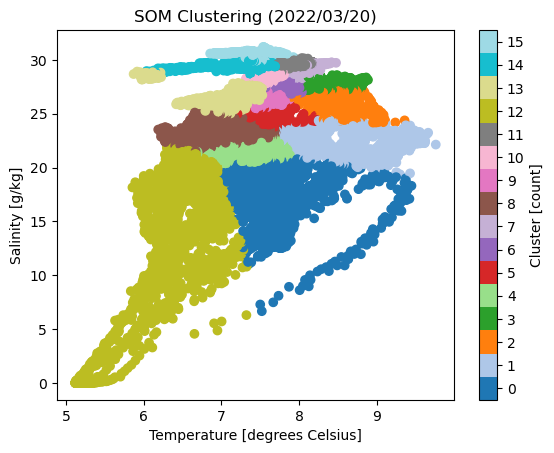

In [2]:
if date[0].month < 10:
    month = '0' + str(date[0].month)
else:
    month = str(date[0].month)

if date[0].day < 10:
    day = '0' + str(date[0].day)  
else:
    day = str(date[0].day) 

fig, ax = plt.subplots()
cmap = plt.get_cmap('tab20', unique.max()+1)
scatter = ax.scatter(inputs2[0],inputs2[1], cmap=cmap, c= predictions, vmin = unique.min(), vmax = unique.max()+1)

cbar = fig.colorbar(scatter, ticks= unique+0.5) 
cbar.set_ticklabels(unique)
cbar.set_label('Cluster [count]')
plt.xlabel('Temperature [degrees Celsius]')
plt.ylabel('Salinity [g/kg]')
plt.title('SOM Clustering' + ' (' + str(date[0].year) + '/' + month + '/' + day + ')')

In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_som.som import SOM
import salishsea_tools.viz_tools as sa_vi
from sklearn import preprocessing

ds = xr.open_dataset ('/results2/SalishSea/nowcast-green.202111/31mar22/SalishSea_1d_20220331_20220331_grid_T.nc')
ds_bio = xr. open_dataset ('/results2/SalishSea/nowcast-green.202111/31mar22/SalishSea_1d_20220331_20220331_biol_T.nc')

    # Variable selection
temp = ds.votemper
saline = ds.vosaline
date = pd.DatetimeIndex(ds['time_counter'].values)

    # Biological variables
sil = ds_bio.silicon
nitr = ds_bio.nitrate
ammo = ds_bio.ammonium

    # Open the mesh mask
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
mask = mesh.tmask.to_numpy()

depth = 0
temp = temp.where(mask[0,depth]==1)
saline = saline.where(mask[0,depth]==1)

sil = sil.where(mask[0,depth]==1)
nitr= nitr.where(mask[0,depth]==1)
ammo = ammo.where(mask[0,depth]==1)

# Post processing 
inputs = np.stack((temp[0,depth].values.flatten(), saline[0,depth].values.flatten()))
indx = np.argwhere(~np.isnan(inputs[0]) & ~np.isnan(inputs[1])) 
inputs2 = inputs[:,indx[:,0]]
inputs3 = preprocessing.normalize(inputs2, norm= 'max')
inputs3 = inputs3.transpose()

# SOM
temp_som = SOM(m=4, n=4, dim= inputs3[0,:].size, lr = 0.1)
temp_som.fit(inputs3, epochs = 5)
predictions = temp_som.predict(inputs3)

# Post processing
unique, counts = np.unique(predictions, return_counts=True)
indx2 = np.full(inputs[0,:].size,np.nan)
indx2[indx[:,0]] = predictions
clusters = np.reshape(indx2,(898,398)) 

Text(0.5, 1.0, 'SOM Clustering (2022/03/31)')

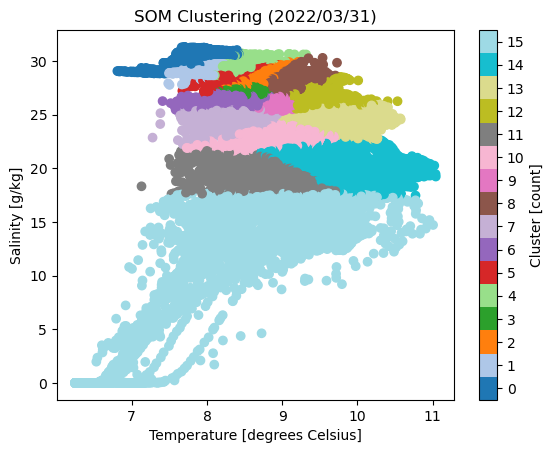

In [4]:
if date[0].month < 10:
    month = '0' + str(date[0].month)
else:
    month = str(date[0].month)

if date[0].day < 10:
    day = '0' + str(date[0].day)  
else:
    day = str(date[0].day) 

fig, ax = plt.subplots()
cmap = plt.get_cmap('tab20', unique.max()+1)
scatter = ax.scatter(inputs2[0],inputs2[1], cmap=cmap, c= predictions, vmin = unique.min(), vmax = unique.max()+1)

cbar = fig.colorbar(scatter, ticks= unique+0.5) 
cbar.set_ticklabels(unique)
cbar.set_label('Cluster [count]')
plt.xlabel('Temperature [degrees Celsius]')
plt.ylabel('Salinity [g/kg]')
plt.title('SOM Clustering' + ' (' + str(date[0].year) + '/' + month + '/' + day + ')')

In [5]:
# Post processing 
inputs = np.stack((temp[0,depth].values.flatten(), saline[0,depth].values.flatten()))
indx = np.argwhere(~np.isnan(inputs[0]) & ~np.isnan(inputs[1])) 
inputs2 = inputs[:,indx[:,0]]
inputs3 = preprocessing.normalize(inputs2, norm= 'max')
inputs3 = inputs3.transpose()

# SOM
temp_som = SOM(m=3, n=2, dim= inputs3[0,:].size, lr = 0.1)
temp_som.fit(inputs3, epochs = 5)
predictions = temp_som.predict(inputs3)

# Post processing
unique, counts = np.unique(predictions, return_counts=True)
indx2 = np.full(inputs[0,:].size,np.nan)
indx2[indx[:,0]] = predictions
clusters = np.reshape(indx2,(898,398)) 

Text(0.5, 1.0, 'SOM Clustering (2022/03/31)')

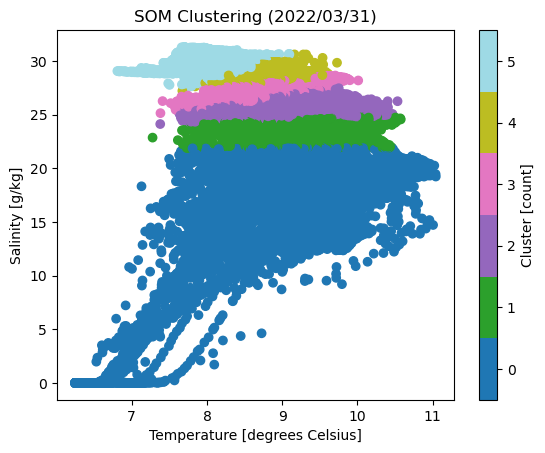

In [6]:
if date[0].month < 10:
    month = '0' + str(date[0].month)
else:
    month = str(date[0].month)

if date[0].day < 10:
    day = '0' + str(date[0].day)  
else:
    day = str(date[0].day) 

fig, ax = plt.subplots()
cmap = plt.get_cmap('tab20', unique.max()+1)
scatter = ax.scatter(inputs2[0],inputs2[1], cmap=cmap, c= predictions, vmin = unique.min(), vmax = unique.max()+1)

cbar = fig.colorbar(scatter, ticks= unique+0.5) 
cbar.set_ticklabels(unique)
cbar.set_label('Cluster [count]')
plt.xlabel('Temperature [degrees Celsius]')
plt.ylabel('Salinity [g/kg]')
plt.title('SOM Clustering' + ' (' + str(date[0].year) + '/' + month + '/' + day + ')')